In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('F:\AI Content\Project\Task 3_Final Content Data set.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [4]:
data.shape

(24573, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   Reaction Type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   Content Type   24573 non-null  object
 4   Category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [6]:
data['Datetime']=pd.to_datetime(data['Datetime'])

In [7]:
data.isnull().sum()

Content ID       0
Reaction Type    0
Datetime         0
Content Type     0
Category         0
Sentiment        0
Score            0
dtype: int64

In [8]:
print(data['Reaction Type'].unique())
print('Unique labels is ', len(data['Reaction Type'].unique()))

['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'love' 'indifferent' 'super love' 'intrigued' 'worried' 'like' 'heart'
 'want' 'adore']
Unique labels is  16


In [9]:
print(data['Content Type'].unique())
print('Unique labels is ', len(data['Content Type'].unique()))

['photo' 'video' 'GIF' 'audio']
Unique labels is  4


In [10]:
print(data['Sentiment'].unique())
print('Unique labels is ', len(data['Sentiment'].unique()))

['negative' 'positive' 'neutral']
Unique labels is  3


In [11]:
data['Reaction Type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction Type, dtype: int64

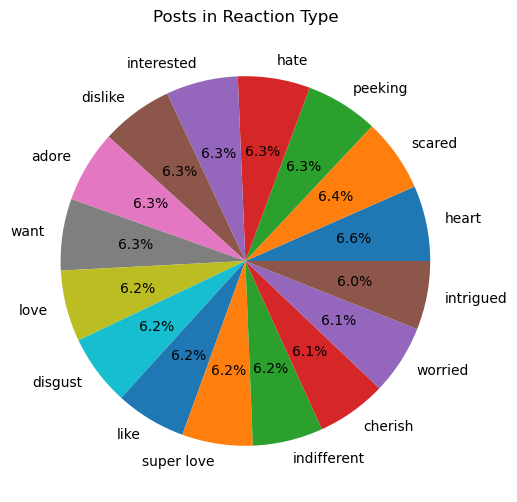

In [12]:
plt.figure(figsize=(6,6))
plt.pie(data['Reaction Type'].value_counts(),labels=data['Reaction Type'].value_counts().index,autopct='%1.1f%%')
plt.title('Posts in Reaction Type')
plt.show()

In [13]:
reaction=data.groupby('Reaction Type')['Score'].mean().sort_values(ascending=False)
reaction

Reaction Type
super love     75.0
adore          72.0
cherish        70.0
want           70.0
love           65.0
heart          60.0
like           50.0
intrigued      45.0
peeking        35.0
interested     30.0
indifferent    20.0
scared         15.0
worried        12.0
dislike        10.0
hate            5.0
disgust         0.0
Name: Score, dtype: float64

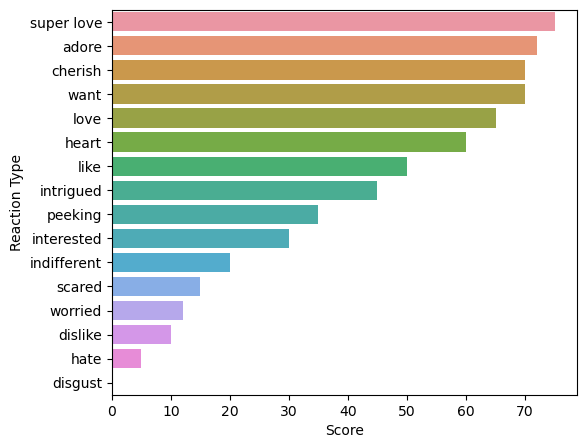

In [15]:
plt.figure(figsize=(6,5))
sns.barplot(y=reaction.index,x=reaction.values)
plt.xlabel("Score")
plt.show()

In [16]:
data.groupby('Content Type')['Score'].count().sort_values(ascending=False)

Content Type
photo    6589
video    6245
GIF      6079
audio    5660
Name: Score, dtype: int64

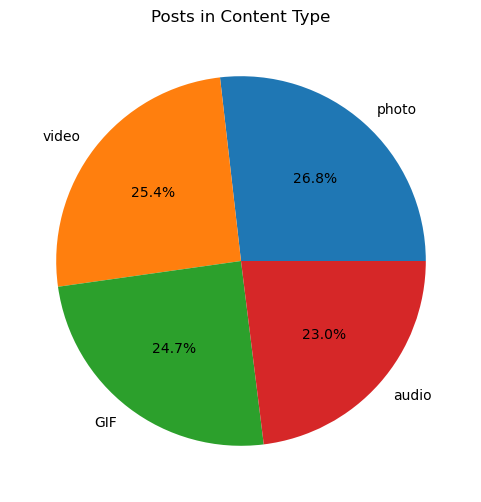

In [17]:
plt.figure(figsize=(6,6))
plt.pie(data['Content Type'].value_counts(),labels=data['Content Type'].value_counts().index,autopct='%1.1f%%')
plt.title('Posts in Content Type')
plt.show()

In [18]:
Content=data.groupby('Content Type')['Score'].sum().sort_values(ascending=False)
Content

Content Type
photo    262838
video    246463
GIF      238217
audio    226127
Name: Score, dtype: int64

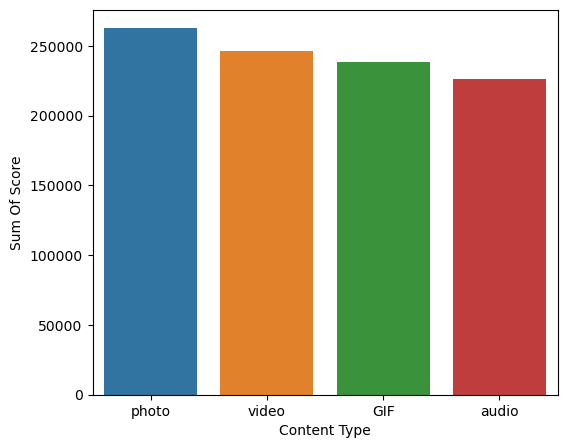

In [19]:
plt.figure(figsize=(6,5))
sns.barplot(x=Content.index,y=Content.values)
plt.ylabel('Sum Of Score')
plt.show()

In [20]:
data['Category'].value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

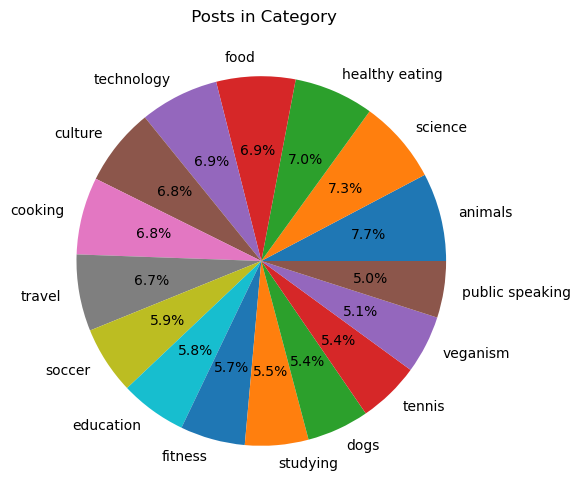

In [21]:
plt.figure(figsize=(6,6))
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct='%1.1f%%')
plt.title(' Posts in Category')
plt.show()

In [22]:
category=data.groupby('Category')['Score'].sum().sort_values(ascending=False)
category

Category
animals            74965
science            71168
healthy eating     69339
technology         68738
food               66676
culture            66579
travel             64880
cooking            64756
soccer             57783
education          57436
fitness            55323
studying           54269
dogs               52511
tennis             50339
veganism           49619
public speaking    49264
Name: Score, dtype: int64

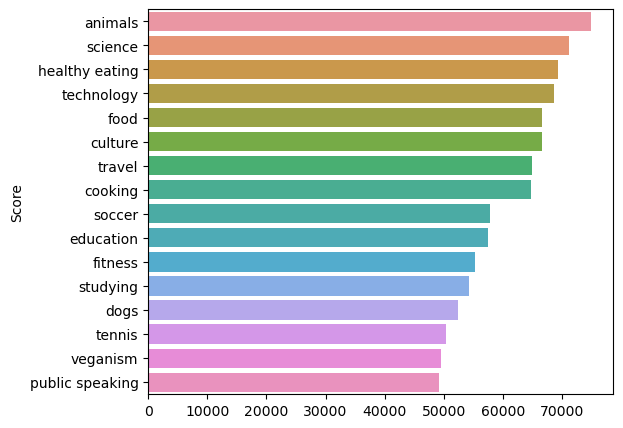

In [23]:
plt.figure(figsize=(6,5))
sns.barplot(x=category.values,y=category.index)
plt.ylabel('Score')
plt.show()

In [24]:
data.Sentiment.value_counts()

positive    13807
negative     7695
neutral      3071
Name: Sentiment, dtype: int64

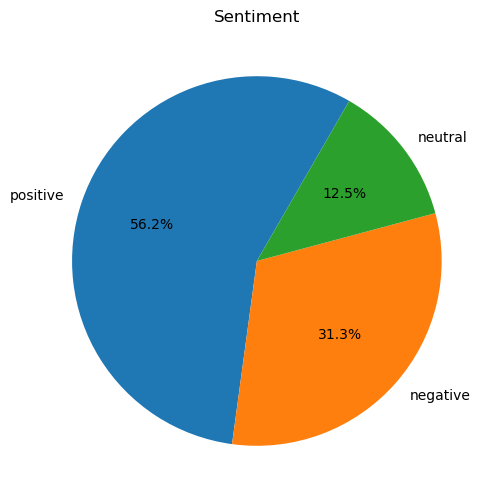

In [25]:
plt.figure(figsize=(6,6))
plt.pie(data['Sentiment'].value_counts(),labels=data['Sentiment'].value_counts().index,autopct='%1.1f%%',startangle=60)
plt.title('Sentiment')
plt.show()

In [26]:
sentiment=data.groupby('Sentiment')['Score'].sum().sort_values(ascending=False)
sentiment

Sentiment
positive    824056
neutral      84805
negative     64784
Name: Score, dtype: int64

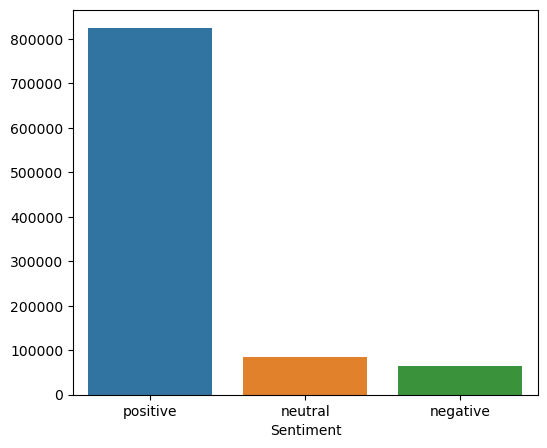

In [27]:
plt.figure(figsize=(6,5))
sns.barplot(y=sentiment.values,x=sentiment.index)
plt.show()

In [28]:
data['year']=data.Datetime.dt.year

In [29]:
data['month']=data.Datetime.dt.month

In [30]:
data['week']=data.Datetime.dt.weekday

In [31]:
year=data.groupby('year')['Score'].count().sort_values(ascending=False)
year

year
2020    13280
2021    11293
Name: Score, dtype: int64

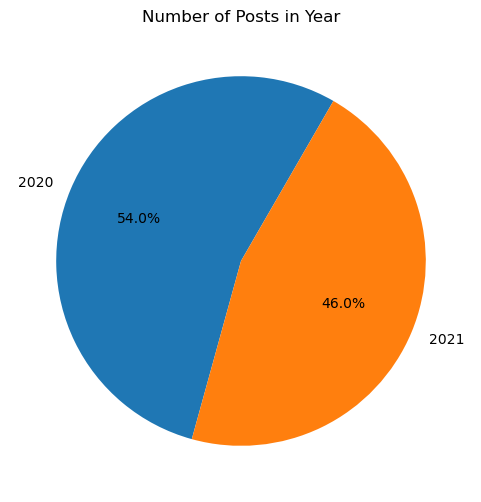

In [33]:
plt.figure(figsize=(6,6))
plt.pie(year,labels=year.index,autopct='%1.1f%%',startangle=60)
plt.title('Number of Posts in Year')
plt.show()

In [34]:
month=data.groupby("month")['Score'].count().sort_index(ascending=True)
month

month
1     2142
2     1890
3     1982
4     1978
5     2110
6     2068
7     2116
8     2055
9     1991
10    2087
11    2055
12    2099
Name: Score, dtype: int64

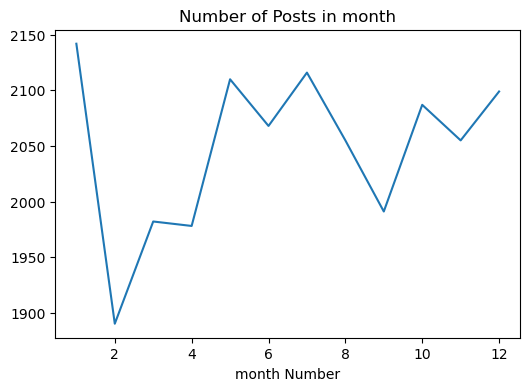

In [36]:
plt.figure(figsize=(6,4))
month.plot()
plt.title('Number of Posts in month')
plt.xlabel('month Number')
plt.show()

In [37]:
day=data.groupby("week")['Score'].count().sort_index()
day

week
0    3523
1    3561
2    3492
3    3492
4    3547
5    3466
6    3492
Name: Score, dtype: int64

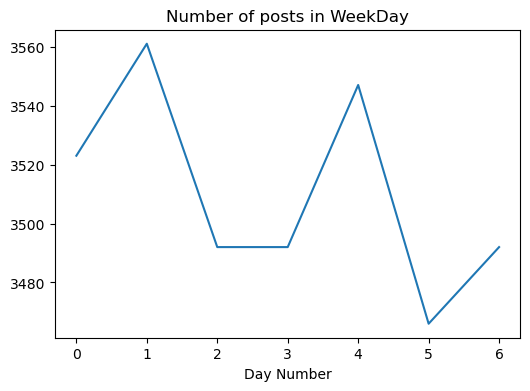

In [38]:
plt.figure(figsize=(6,4))
sns.lineplot(x=day.index,y=day.values)
plt.title('Number of posts in WeekDay')
plt.xlabel("Day Number")
plt.show()

In [39]:
data['hour']=data.Datetime.dt.hour

In [40]:
hour=data.groupby('hour')['Score'].count()
hour

hour
0     1029
1     1017
2      975
3     1024
4     1011
5     1038
6     1087
7     1044
8     1060
9     1075
10    1001
11    1026
12     960
13    1013
14    1001
15    1021
16    1044
17     988
18    1013
19    1010
20    1024
21    1019
22    1021
23    1072
Name: Score, dtype: int64

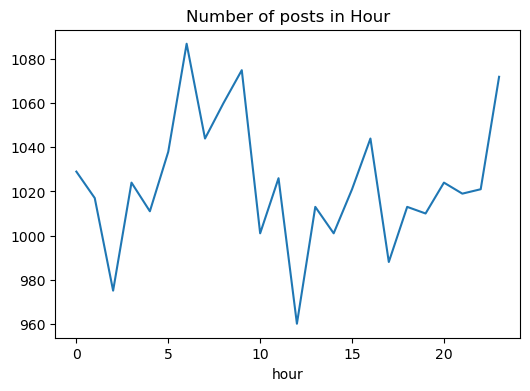

In [41]:
plt.figure(figsize=(6,4))
sns.lineplot(x=hour.index,y=hour.values)
plt.title('Number of posts in Hour')
plt.xlabel("hour")
plt.show()